# Peter Norvik Spell Check - Error Type Coding

In [45]:
blog[['content','corrections','changes','checks']]

,content,corrections,changes,checks
12922,"hi,my name is chenhongjun,I studey english,I ...","[[study, studey], [skye, skype], [q, qq]]","[-e, -p, -q]","[del, del, del]"
11966,I talked with my friend of high schooldays on ...,"[[skye, skype], [surprised, suprised], [low, l...","[-p, +r, -l, +w, +a, +x, -r, -y]","[del, ins, rep, ins, ins, del]"
8614,I had not written this diary for long time.. ...,"[[their, thier], [their, thier], [should, slou...","[+e, -e, +e, -e, -l, +h, -a, +q]","[tra, tra, rep, rep]"
15087,Yesterday I watched the baseball game of the J...,"[[series, seriese], [tokyo, togyo], [battered,...","[-e, -g, +k, -l, +r, +t, +c, -c, +n, -e, +c]","[del, rep, rep, ins, ins, del, ins]"
16272,What is the difference between existence and l...,"[[which, whcih]]","[+i, -i]",[tra]
7685,"Today, I received some books from amazon.co.uk...",[],[],[]
16982,I'm going to try keeping a diary in English. ...,"[[est, 1st], [bishop, hiphop], [musical, music...","[-1, +e, -h, +b, -p, +s, -1, -2, -c]","[rep, rep, del, del, del]"
8720,Wish a big smile on your face everyday!,[],[],[]
10431,http://practiz.tumblr.com/post/159321699/too-s...,"[[help, http], [practice, practiz], [tumble, t...","[-t, -t, +e, +l, -z, +c, +e, -r, +e, -i, -l, -...","[rep, rep, rep, del, rep, rep, del]"
306,It is cloudy and very sultrytoday. I went to m...,"[[housework, homework]]","[-m, +u, +s]",[rep]


-----------------

# <span style="color:red">BACKUP OF PERSONALIZED NLP DESIGN</span>

<a id="top"></a>

#### <span style="color:darkred">__Part 1: Data Exploration__ https://github.com/kimrharper/thinkful/blob/master/unit3/unit3-capstone-exploration.ipynb </span><br><br><span style="color:darkred">__Part 2: Models__ https://github.com/kimrharper/thinkful/blob/master/unit3/unit3-capstone-models.ipynb </span>

----

# <span style="color:darkred">Part 1: </span><span style="color:darkblue">L1 Prediction from ELL Writing Samples</span>

__Author:__ Ryan Harper 

----

<a href='#ov'>Overview</a><br>
<a href='#exp'>Experiment</a><br>
<a href='#sec1'>1. Cleaning Data</a><br>
<a href='#sec2'>2. Exploring the Data</a><br>

<a id="ov"></a>

# <span style="color:darkblue">Overview</span>  <a href='#top'>(top)</a>

__Data Source:__
> http://lang-8.com/ [scraped with Beautiful Soup]

![alt text](../data/language/lang8.png "Title")

__Summary:__
> In my previous profession, I have been teaching English to a diverse range of students of all ages, language background, and country origin. During my professional development, I started to observe that different students with different L1s (1st Language) tended to display different patterns of communication that appeared to have some connection to either education in their country of origin or a connection to the linguistic structure of their first language. Different ELL (English Language Learners) needed to focus on different aspects of the English language depending on their background. The purpose of this project is to use a large number of blog posts from a language practicing website and explore whether or not the L1 has any significant impact on the blog writing style of the English learner.<br><br>Part 1: Explore the data to find any noteworthy trends in linguistic structure: <ol><li> vocabulary (word freq, collocations, and cognates) <li>syntax (sentence structure)<li>grammar (i.e. grammar complexity of sentences) <li>errors (types of errors) <li> parts of speech (NLTK Abbreviations: https://pythonprogramming.net/natural-language-toolkit-nltk-part-speech-tagging/)</ol><br>Part 2: Use linguistic trends to determine whether or not a learner's first language can be predicted.

__Variables:__
>__id:__ _User ID_<br>
__time:__ _Time the blog post was scraped (in order of user posted time)_ <br>
__title:__ _Title of the blog post_<br>
__content:__ _The blog post_<br>
__language:__ _User's self-reported first language_

<a id="exp"></a>

# <span style="color:darkblue">Experiment</span> <a href='#top'>(top)</a>

__Hypothesis:__ 
> L1 (first language) experience and academic environment influences ELLs' (English Language Learners') writing style. The L1 of ELLs can be predicted by looking at English blog posts and identifying patterns unique to their L1.

__Observations:__
><li> --<li>--<li>--

__Method:__
> Using multiple different models. The aim of this project is to explore how different models can handle the data (target and features) and to see what information can be gained from using multiple different models. Ultimately, the goal is to determine which models are appropriate for a binary (discrete) target with features that are both qualitative (discrete) and quantitative (ranked/continuous).

<a id="sec1"></a>

# <span style="color:darkblue">1. Cleaning the Data</span>  <a href='#top'>(top)</a>

In [1]:
# from nltk.corpus import brown
# nltk.download('brown')

In [2]:
# iPython/Jupyter Notebook
import time
from pprint import pprint
import warnings
from IPython.display import Image

# Data processing
import pandas as pd
import plotly as plo
import seaborn as sns
from collections import Counter

# Statistics
from scipy import stats
from scipy.stats import ttest_ind, mannwhitneyu, median_test, f_oneway

# NLP
from nltk.corpus import stopwords as sw
from nltk.util import ngrams
from nltk.corpus import brown
import nltk
import re
from nltk.tokenize import RegexpTokenizer
import difflib

# import altair as alt

In [3]:
# load and close files
def get_text(link):
    with open(link) as f:
        output = f.read()
    return output

In [4]:
# Jupyter Settings and Imports
%pylab
%matplotlib inline 
warnings.filterwarnings(action='once')

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [5]:
# Import data
blog = pd.read_csv('../data/language/blogdata-reduced.csv')
blog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18702 entries, 0 to 18701
Data columns (total 6 columns):
Unnamed: 0    18702 non-null int64
id            18702 non-null int64
time          18702 non-null object
title         18702 non-null object
content       18702 non-null object
language      18702 non-null object
dtypes: int64(2), object(4)
memory usage: 876.7+ KB


In [6]:
# Import data
blog = pd.read_csv('../data/language/blogdata-reduced.csv').sample(frac=.01)

# Clean Data
del blog['Unnamed: 0']
blog.language = blog.language.mask(blog.language == 'Mandarin', 'Traditional Chinese').replace(['Persian', 'Arabic',
        'Bulgarian', 'Swedish', 'Slovenian', 'Slovak', 'Malay', 'Turkish','Romanian', 'Czech', 'Danish', 'Vietnamese',
        'Norwegian','Serbian','Other language','Lithuanian', 'Ukrainian', 'Finnish','Estonian','Bengali','Russian', 
        'Spanish','French', 'German', 'Cantonese','Mongolian', 'Tagalog', 'Polish', 'Dutch','Italian', 'Portuguese(Brazil)', 
        'Thai', 'Indonesian', 'Cantonese','Urdu', 'Hungarian'], np.nan)
blog = blog.dropna()

In [7]:
blog.info(verbose=False, memory_usage=False,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 12922 to 11532
Columns: 5 entries, id to language
dtypes: int64(1), object(4)

In [8]:
blog.head()

,id,time,title,content,language
12922,3772,2018-06-22 21:38:52.693391+00:00,"hi,my name is chenhongjun,I studey english,I ...","hi,my name is chenhongjun,I studey english,I ...",Traditional Chinese
11966,3485,2018-06-18 19:38:26.011279+00:00,Skype! my first time!,I talked with my friend of high schooldays on ...,Japanese
8614,2381,2018-06-14 01:12:47.708668+00:00,I finished my graduation test,I had not written this diary for long time.. ...,Japanese
15087,4432,2018-07-07 00:02:14.930159+00:00,Baseball game,Yesterday I watched the baseball game of the J...,Japanese
16272,4777,2018-07-10 05:09:07.243860+00:00,Do not exist but live happily,What is the difference between existence and l...,Korean


In [9]:
# Confirmation that there are no more null values
blog.isnull().values.any()

False

In [10]:
def lettercheck(val):
    reLetters = re.compile('[^a-zA-Z]')
    onlyletters = reLetters.sub('', val)
    return len(onlyletters)/len(val)

In [11]:
blog['letters_per'] = blog.content.apply(lettercheck)
print('Blogs with less than 50% letter percentage: {}'.format(blog.loc[blog['letters_per'] <= .5].content.count()))
blog = blog.loc[blog['letters_per'] > .5]

Blogs with less than 50% letter percentage: 2


<a id="sec2"></a>

# <span style="color:darkblue">2. Exploring the Data</span>  <a href='#top'>(top)</a>

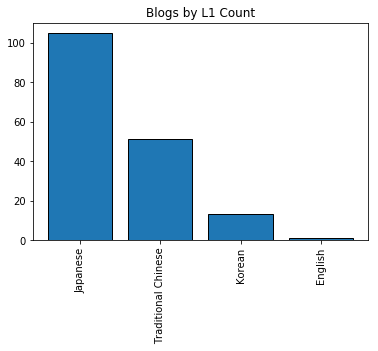

In [12]:
vals = list(blog.language.value_counts().values)
languages = list(blog.language.value_counts().index)
plt.figure(figsize(6,4))
plt.bar(languages,vals,edgecolor='black')
plt.title('Blogs by L1 Count')
plt.xticks(rotation='vertical')
plt.show()

In [13]:
blog.loc[blog.language == 'English'].count()

id             1
time           1
title          1
content        1
language       1
letters_per    1
dtype: int64

In [14]:
blog['char_count'] = blog.content.apply(len)

In [15]:
def reject_outliers(data, m=3):
    data = data[abs(data - np.mean(data)) < m*np.std(data)]
    return data[~numpy.isnan(data)]

lanlenseries = [reject_outliers(blog.char_count[blog.language == l]) for l in list(blog.language.unique())]

In [16]:
list(blog.language.unique())

['Traditional Chinese', 'Japanese', 'Korean', 'English']

/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:198: RuntimeWarning:

Mean of empty slice.

/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning:

invalid value encountered in double_scalars

/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:838: RuntimeWarning:

invalid value encountered in true_divide



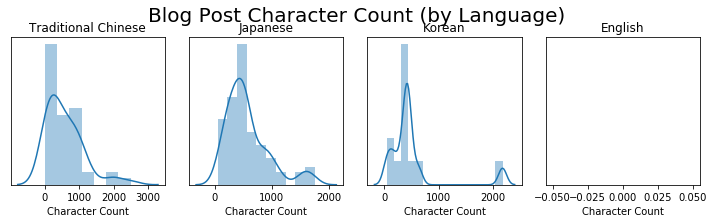

In [17]:
i = 1
plt.figure(figsize=(10,3))

languages = [l for l in list(blog.language.unique())]

for n, column in enumerate(lanlenseries):
    plt.subplot(1, 4, i)
    i = i + 1
    sns.distplot(column)
    plt.title(languages[n])
    plt.yticks([])
    plt.xlabel('Character Count')

plt.tight_layout()
plt.suptitle('Blog Post Character Count (by Language)',fontsize=20,y=1.02)
plt.show()

<a id="nlp"></a>

### <span style="color:darkred">NLP: Spell Check, Tokenization, Collocations, Parts of Speech, and Syntax</span>  <a href='#top'>(top)</a>

__Analyze Characters__

In [18]:
from string import punctuation
from collections import Counter

def per_check(string_value, total):
    percentage = len(string_value)
    if percentage != 0:
        percentage = float(total / percentage)
    else:
        percentage = 0
        
    return percentage

def punc_count(string_value):
    count = 0
    for c in string_value:
        if c in punctuation:
            count+= 1
    return per_check(string_value, count)

def caplet_count(string_value):
    count = 0
    for c in string_value:
        if c.isupper():
            count+= 1
    
    return per_check(string_value, count)

__Initialize Dictionary__

In [19]:
import re
from collections import Counter

# collects all the words loaded in a text object and breaks them into words using Regex
def words(text): return re.findall(r'\w+', text.lower())

# 1. populates the data set with real corpora...could be expanded to include user's personal content
# 2. counts the number of times a word occurs in the corpora
# WORDS = Counter(words(get_text('../data/dic/big.txt')))
WORDS = Counter(map(str.lower, brown.words()))

In [20]:
def P(word, N=sum(list(WORDS.values()))): 
    # Calculates the frequency count a word occurs in the overall WORDS list (i.e. 'the' has a high percentage)
    return WORDS[word] / N

def correction(word): 
    # Collects list of possible words only exist in WORDS and checks probability
    wordlist = candidates(word)
    finalcorrection = max(wordlist, key=P)
    
    possiblechoices = {}
    
    for w in wordlist:
        possiblechoices[w] = P(w)
        
    return finalcorrection

def blog_corrections(l):
    corrected = []
    for w in l:
        c = correction(w)
        if c != w:
            corrected.append([c,w])
#     print('|',end='')
    return corrected

def candidates(word): 
    # (1) return word if in WORDS (i.e. correct), 
    # (2) return word if edits1 of word results in word in WORDS (i.e. typo)
    # (3) return word if edits2 on each word in edits1 results in a word in WORDS (i.e. 2 typos)
    answer = (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])
    return answer

def known(words): 
    # checks list of words to see if they exists in the WORDS database
    return set(w for w in words if w in WORDS)

def edits1(word):
    # initialize the letters
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    
    # Create a list of splits for the word so that four processes can be run at each split: (# of splits = length of word)
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    
    # 1. Create a list of one letter deletes from R side of split
    deletes    = [L + R[1:]               for L, R in splits if R]
    
    # 2. Create a list of words with switched letters using L,R from split for position
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    
    # 3. Create a list of words with replaced letters from R side of split using 26 letters * number splits
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    
    # 4. Create a list of words with letter inserts between L and R of split using 26 letters * number splits
    inserts    = [L + c + R               for L, R in splits for c in letters]
    
    # Returns the unique set of all real and unreal words created from each of the four processes
    return set(deletes + transposes + replaces + inserts)

def edits2(word):
    # If edits1 does not return a known word, edits2 check runs a process on each uknown word made in edits1
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

In [21]:
def changes_list(l):
    cha = []
    for c,w in l:
        cha.append(changes(c,w))
    
    if len(cha) > 0:
        return list(np.concatenate(np.array(cha)))
    else:
        return []

def changes(check,word):
    changes = []
    for i,s in enumerate(difflib.ndiff(word, check)):
        if s[0]==' ': continue
        elif s[0]=='-':
            changes.append('-'+s[-1])
        elif s[0]=='+':
            changes.append('+'+s[-1])  
    return changes

def check_list(l):
    checks = []
    for c,w in l:
        checks.append(check(c,w))
        
    return checks
        

def check(check,word):
    c = True
    letters = 'abcdefghijklmnopqrstuvwxyz'
    l = []
    
    while c:
        if len(l) == 0:
            splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
            deletes    = [L + R[1:]               for L, R in splits if R]
            if check in deletes:
                return 'del'
            transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
            if check in transposes:
                return 'tra'
            replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
            if check in replaces:
                return 'rep'
            inserts    = [L + c + R               for L, R in splits for c in letters]
            if check in inserts:
                return 'ins' 
            l = list(set(deletes + transposes + replaces + inserts))
            
        else:
            for word in l:
                splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]

                deletes    = [L + R[1:]               for L, R in splits if R]
                if check in deletes:
                    return 'del'

                transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
                if check in transposes:
                    return 'tra'

                replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
                if check in replaces:
                    return 'rep'

                inserts    = [L + c + R               for L, R in splits for c in letters]
                if check in inserts:
                    return 'ins'
                
            c == False

__Initialize NLTK variables__

In [22]:
# Set NLP Variables
stop_words = set(sw.words('english'))
tokenizer = RegexpTokenizer(r'\w+')
punct = re.compile(r'\w')
nountype = re.compile(r'N')
preplist = [i[0] for i in [('of', 268),('in', 209),('for', 123),('that', 81),('on', 70),('with', 70),('from', 51),
                           ('at', 45),('as', 44),('about', 42),('if', 39),('by', 36),('like', 31),('because', 19),
                           ('than', 17),('after', 17),('over', 15), ('without', 15),('before', 14),('so', 12),
                           ('though', 12),('since', 11),('into', 10), ('whether', 9),('while', 9),('during', 7),
                           ('under', 7), ('through', 6),('out', 6),('above', 6)]]

detlist = [i[0] for i in [('the', 25028), ('a', 16990), ('this', 5456), ('some', 2027), ('that', 1703), ('an', 1657), 
                          ('all', 1390), ('no', 946), ('these', 880), ('every', 664), ('any', 605), ('each', 449), 
                          ('another', 386),('those', 375),('both', 218),('either', 24),('neither', 10)]]

cclist = [i[0] for i in [('and', 15733),('but', 5601), ('or', 2314), ('nor', 33),('either', 20),
                         ('plus', 16), ('neither', 12)]]

# My personal syntax tree (needs improvement)
chunkGram = r"""
Question: {^<WP|WRB>|^<MD>}
Passive: {<RB>?<MD>?<RB>?<VBD|VB|VBP><RB>?<VBN><RB>?<VBN>?}
Active: {<RB>?<MD>?<RB>?<VB\w?>+<RB>?}
CP: {<JJ\w?>+}
NP:{(<DT|PRP.>|<CP>)<N\w+|PRP>}
NPC: {<NP><CC><NP>}
PP:{<IN><NP>}
INF:{<TO><VB><PP>?}
PRT: {<VBG>}
NPP: {<NP|PP|INF|PRT><NP|PP|INF|PRT>}
Subject: {<NP|NPP|NPC|N\w+|PRP>}<Active|Passive>
Object: <Active|Passive|Imperative>{<NP|NPP|NPC|N\w+|PRP>|(<IN><NPP|NP|N\w+|PRP>)}
Imperative: {^<Active>}
Adverbial: {<RB>}
"""

/anaconda3/lib/python3.6/site-packages/nltk/corpus/reader/wordlist.py:28: ResourceWarning:

unclosed file <_io.BufferedReader name='/Users/ryan/nltk_data/corpora/stopwords/english'>



In [23]:
nltk.pos_tag?

Signature: nltk.pos_tag(tokens, tagset=None, lang='eng')
Docstring:
Use NLTK's currently recommended part of speech tagger to
tag the given list of tokens.

    >>> from nltk.tag import pos_tag
    >>> from nltk.tokenize import word_tokenize
    >>> pos_tag(word_tokenize("John's big idea isn't all that bad."))
    [('John', 'NNP'), ("'s", 'POS'), ('big', 'JJ'), ('idea', 'NN'), ('is', 'VBZ'),
    ("n't", 'RB'), ('all', 'PDT'), ('that', 'DT'), ('bad', 'JJ'), ('.', '.')]
    >>> pos_tag(word_tokenize("John's big idea isn't all that bad."), tagset='universal')
    [('John', 'NOUN'), ("'s", 'PRT'), ('big', 'ADJ'), ('idea', 'NOUN'), ('is', 'VERB'),
    ("n't", 'ADV'), ('all', 'DET'), ('that', 'DET'), ('bad', 'ADJ'), ('.', '.')]

NB. Use `pos_tag_sents()` for efficient tagging of more than one sentence.

:param tokens: Sequence of tokens to be tagged
:type tokens: list(str)
:param tagset: the tagset to be used, e.g. universal, wsj, brown
:type tagset: str
:param lang: the ISO 639 code of the 

In [24]:
nltk.tag.brill.BrillTagger?

Init signature: nltk.tag.brill.BrillTagger(initial_tagger, rules, training_stats=None)
Docstring:     
Brill's transformational rule-based tagger.  Brill taggers use an
initial tagger (such as ``tag.DefaultTagger``) to assign an initial
tag sequence to a text; and then apply an ordered list of
transformational rules to correct the tags of individual tokens.
These transformation rules are specified by the ``TagRule``
interface.

Brill taggers can be created directly, from an initial tagger and
a list of transformational rules; but more often, Brill taggers
are created by learning rules from a training corpus, using one
of the TaggerTrainers available.
Init docstring:
:param initial_tagger: The initial tagger
:type initial_tagger: TaggerI

:param rules: An ordered list of transformation rules that
    should be used to correct the initial tagging.
:type rules: list(TagRule)

:param training_stats: A dictionary of statistics collected
    during training, for possible later use
:type trai

In [25]:
def tokendict(d):
    for sw in stop_words:
        if sw in d:
            del d[sw]
    return d


# nltk.brill_tagger
# text_blob
# nlkt.pos_tag

def onlygetPOS(val):
#     tagged = nltk.pos_tag(nltk.word_tokenize(val)) 
    
    tagged = nltk.pos_tag(nltk.word_tokenize(val))
    return [v if punct.search(v) else 'PUNCT' for i,v in tagged ]

def onlygetCC(val):
    tagged = nltk.pos_tag(nltk.word_tokenize(val))   
    return [i for i,v in tagged if i in cclist]

def onlygetDET(val):
    tagged = nltk.pos_tag(nltk.word_tokenize(val))   
    return [i for i,v in tagged if i in detlist]

def onlygetPREP(val):
    tagged = nltk.pos_tag(nltk.word_tokenize(val),tagset=None, lang='eng')
    return [i for i,v in tagged if i in preplist]

def getPOS(val):
    words = nltk.word_tokenize(val)
    return nltk.pos_tag(words)

def getSYNTAX(val):
    chunkParser = nltk.RegexpParser(chunkGram)
    chunked = chunkParser.parse(getPOS(val))
    return chunked

def getNOUNTYPE(val):
    tagged = nltk.pos_tag(nltk.word_tokenize(val))
    return [v for i,v in tagged if nountype.search(v)]

# create set of stop words from nltk corpus
def posbigram(value):
    bigrm = list(nltk.bigrams(value))
    bigramlist = []
    
    for bigram in bigrm:
        bigramlist.append('-'.join(bigram))
        
    return bigramlist

In [26]:
%%time
blog['tokens'] = blog.content.str.lower().apply(tokenizer.tokenize)
blog['word_count'] = blog.tokens.apply(len)
blog['punc_per'] = blog.content.apply(punc_count)
blog['caplet_per'] = blog.content.apply(caplet_count)

CPU times: user 24.1 ms, sys: 1.06 ms, total: 25.1 ms
Wall time: 26.4 ms


In [27]:
%%time
blog['pos'] = blog.content.str.lower().apply(onlygetPOS)
blog['determiners'] = blog.content.str.lower().apply(onlygetDET)
blog['prepositions'] = blog.content.str.lower().apply(onlygetPREP)
blog['complementizer'] = blog.content.str.lower().apply(onlygetCC)
blog['ntype'] = blog.content.str.lower().apply(getNOUNTYPE)

CPU times: user 5.19 s, sys: 83.3 ms, total: 5.27 s
Wall time: 5.39 s


In [28]:
%%time
blog['corrections'] = blog.tokens.apply(blog_corrections)

CPU times: user 31.3 s, sys: 224 ms, total: 31.5 s
Wall time: 32 s


In [29]:
%%time
blog['checks'] = blog.corrections.apply(check_list)
blog['changes'] = blog.corrections.apply(changes_list)
blog['error_per'] = blog.corrections.apply(len) / blog.word_count

CPU times: user 2.24 s, sys: 10.7 ms, total: 2.25 s
Wall time: 2.26 s


In [31]:
blog['pos_bigram'] = blog.pos.apply(posbigram)

__Backup File__

In [32]:
blog.to_csv('processed_blog_data.csv')

__Bar Plots__

In [33]:
lang = list(blog.language.unique())

def count_vals_df(df,col):
    return pd.DataFrame(data = [Counter(np.concatenate(np.array(df[col][blog.language == l]))) for l in lang], 
                        index = [l for l in lang]).T.fillna(0).sort_values(by='Japanese',ascending=False)

def graphsum(df):
    for l in df:
        df[l] = df[l]/df[l].sum()
    return df

def graph_bar(df,name,dim):
    graphsum(df).plot.bar(rot=0,figsize=dim)
    plt.title(name)
    plt.show()
    
def graph_hbar(df,name,dim):
    graphsum(df).plot.barh(rot=0,figsize=dim)
    plt.title(name)
    plt.show()

In [34]:
fig= planguage.iloc[900:-1].plot.barh(rot=0,figsize=(50,50))
plt.savefig('partsofspeech.png')
plt.close()

NameError: name 'planguage' is not defined

In [ ]:
blog.head()

In [ ]:
posDF = count_vals_df(blog,'pos').drop(['NN','PUNCT'])
graph_bar(posDF,'Parts of Speech',(22, 4))

posbigDF = count_vals_df(blog,'pos_bigram').iloc[15:39]
graph_bar(posbigDF,'Parts of Speech - Bigrams',(22, 4))

prepDF = count_vals_df(blog,'prepositions')
graph_bar(prepDF,'Prepositions',(22, 4))

lettersDF = count_vals_df(blog,'changes').iloc[20:60]
graph_bar(lettersDF.iloc[0:40,0:4],'Letter Mistake',(22, 4))

detDF = count_vals_df(blog,'determiners')
graph_bar(detDF,'Determiners',(22, 4))
    
ccDF = count_vals_df(blog,'complementizer')
graph_bar(ccDF,'Complementizers',(11, 2))

checksDF = count_vals_df(blog,'checks')
graph_bar(checksDF,'Spelling Mistake',(11, 2))

ntypeDF = count_vals_df(blog,'ntype').drop(['IN','VBN'])
graph_bar(ntypeDF,'Noun Type',(11, 2))

__Correlations__

In [ ]:
blog.head(10)

In [ ]:
corr = blog[['word_count','letters_per','punc_per','caplet_per','error_per']].corr(); print(corr)
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot=True)
plt.show()

__A. Scatterplot using univariate and bivariate methods__

In [ ]:
# Make the scatterplot matrix
featurelist = ['word_count','letters_per','punc_per','caplet_per','error_per']


g = sns.PairGrid(data=blog, diag_sharey=False, hue="language", vars=featurelist, palette=['blue','orange','green','red'])
g.map_offdiag(plt.scatter, alpha=.4)
g.map_diag(sns.kdeplot, lw=2)

g.add_legend()

plt.show()

<a id="sec3"></a>

###  <span style="color:darkblue">C. Statistical Significance <a href='#top'>(top)</a>

1. 'Multi class classification problem' 'Mutually exclusive classes'

2. Run Test on Japanese/English vs Chinese/English

__A. Mood’s Median test (2+ Non-Normally Distributed Independent Samples)__

__Null Hypothesis:__ Assumes samples are from same 1st language population.

In [ ]:
stat, p, med, tbl = median_test(blog['error_per'].loc[blog['language'] == 'Japanese'],blog['error_per'].loc[blog['language'] == 'Korean'],blog['error_per'].loc[blog['language'] == 'Traditional Chinese'],blog['error_per'].loc[blog['language'] == 'English'])
print(stat,med)
print(p)

In [ ]:
# print(len(*blog['language'].isin(lang)))

In [ ]:
stat, p, med, tbl = median_test(*blog['language'].isin(lang))
print(stat,med)
print(p)

p-value is less than 5% and disproves the null hypothesis. With regards to error percentage, L1 language samples have different distributions.

__B. One-Way AnovaTest (2+ Normally Distributed Independent Samples)__

__Null Hypothesis:__ Assumes samples are from same 1st language population.

In [ ]:
f, p = f_oneway(blog['error_per'].loc[blog['language'] == 'Japanese'],blog['error_per'].loc[blog['language'] == 'Korean'],blog['error_per'].loc[blog['language'] == 'Traditional Chinese'],blog['error_per'].loc[blog['language'] == 'English'])

print("F-Value: {}, p:{}".format(f,p))

p-value is less than 5% and disproves the null hypothesis. L1 samples have different distributions.

<a id="output"></a>

# <span style="color:darkblue">Feature Processing for Models:</span>  <a href='#top'>(top)</a>

In [ ]:
def create_dummy_count_df(df,col,keep=[]):
    colset = set(df[col].sum())
    if len(keep) > 0:
        colset = [k for k in keep if k in colset]
    newdf = pd.DataFrame()
    
    for c in colset:
        newdf[col+'_'+str(c)] = df[col].apply(lambda val: val.count(c) )
        
    print('Created dummy counter for {} features'.format(col))
        
    return newdf

In [ ]:
keepletters = ['+e','+a','-t', '-n', '-i', '-a', '-e', '-s', '-o', '+l', '+s', '+t', '+o', '+r', '+h', '-l', '+i', 
               '-m', '-u', '+n', '-k', '-c', '-r', '-v', '+d', '-p', '-y', '-g', '+u', '-h', '-d', '+c', '+w', '+m', 
               '-b', '-0', '+p', '-j', '-w', '+y']

In [ ]:
%%time
postags = create_dummy_count_df(blog,'pos')
posbigramtags = create_dummy_count_df(blog,'pos_bigram')
dettags = create_dummy_count_df(blog,'determiners')
checktags = create_dummy_count_df(blog,'checks')
preptags = create_dummy_count_df(blog,'prepositions')
comptags = create_dummy_count_df(blog,'complementizer')
lettertags = create_dummy_count_df(blog,'changes',keepletters)

In [ ]:
# Inverse Frequency

In [ ]:
features.head()

In [ ]:
features.head()

In [ ]:
blog_data = pd.DataFrame(blog[['id','char_count','language','word_count','punc_per','caplet_per','error_per']])
tags = [postags,posbigramtags,dettags,checktags,preptags,comptags,blog_data]
features = tags[0]
tags = tags[1:]
for i in range(len(tags)):
    features = features.merge(tags[i], how='outer', left_index=True, right_index=True)

__Group data by user averages:__

In [ ]:
features.groupby('id').language.apply(lambda x: x == 'Japanese')

In [ ]:
features.

__Save Data:__

In [ ]:
%%time
features.to_csv('blogfeatures.csv')
# features_user.to_csv('userblogfeatures.csv')

----